# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#input_shape = (28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 39s 12ms/step - loss: 0.4563 - accuracy: 0.8550 - val_loss: 0.0715 - val_accuracy: 0.9773
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0575 - accuracy: 0.9811 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0390 - val_accuracy: 0.9892


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9914


0.9914000034332275

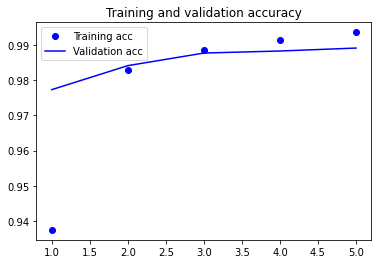

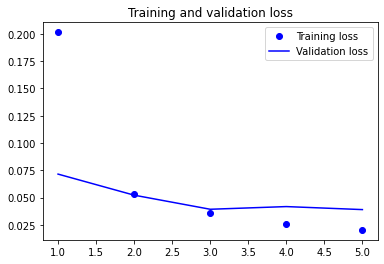

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier

def create_model(optimizer='adam'):
 # create model
 model = models.Sequential()
 model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(64, (3, 3), activation='relu'))
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(64, (3, 3), activation='relu'))
 model.add(layers.Flatten())
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(10, activation='softmax'))

 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 return model

model = KerasClassifier(build_fn=create_model, epochs=3, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam'] #'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.985817 using {'optimizer': 'RMSprop'}
0.980483 (0.000352) with: {'optimizer': 'SGD'}
0.985817 (0.001744) with: {'optimizer': 'RMSprop'}
0.985517 (0.000967) with: {'optimizer': 'Adam'}


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [11]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.4437 - accuracy: 0.8572 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0555 - val_accuracy: 0.9842
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0372 - val_accuracy: 0.9906
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0424 - val_accuracy: 0.9898
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0381 - val_accuracy: 0.9896

In [12]:
import pandas as pd

history_df = pd.DataFrame(model.history.history)

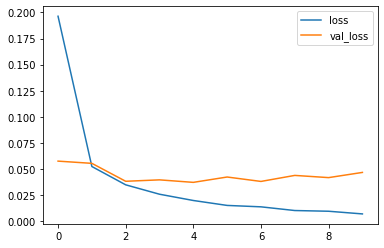

In [13]:
history_df[['loss','val_loss']].plot()

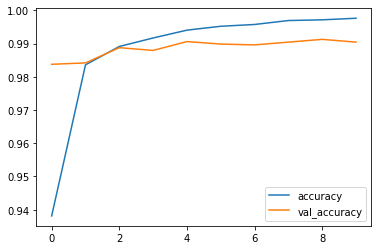

In [14]:
history_df[['accuracy','val_accuracy']].plot()